In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../course_notebooks/DATA/cement_slump.csv')
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [3]:
print(df.columns)
df.corr()['Compressive Strength (28-day)(Mpa)']

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')


Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

<AxesSubplot:>

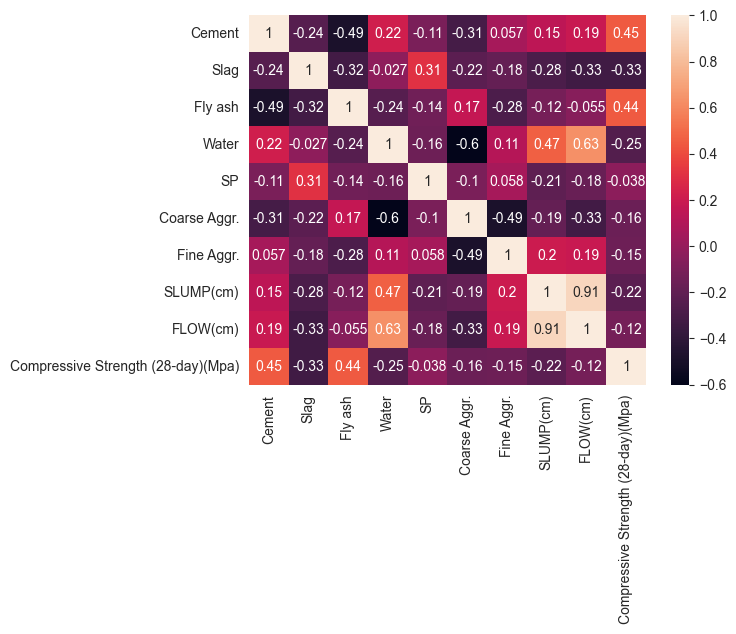

In [4]:
sns.heatmap(df.corr(),annot=True)

In [5]:
df.columns


Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [6]:
x = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=101)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
s_x_train = scaler.fit_transform(x_train)
s_x_test = scaler.transform(x_test)

In [11]:
from sklearn.svm import SVR,LinearSVR
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,          default='rbf'


In [13]:
base_model = SVR()
base_model.fit(s_x_train,y_train)
base_predictions = base_model.predict(s_x_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,base_predictions))
print(np.sqrt(mean_squared_error(y_test,base_predictions)))
print(y_test.mean())

4.606437553692728
6.391449314821403
36.46545454545455


In [14]:
from sklearn.model_selection import GridSearchCV
svr = SVR()
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'kernel':['linear','rbf','poly'],'gamma':['scale','auto'],'degree':[2,3,4],'epsilon':[0,0.01,0.1,0.5,1,2]}
grid = GridSearchCV(svr,param_grid)
grid.fit(s_x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [15]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [16]:
predictions = grid.predict(s_x_test)
print(mean_absolute_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))
print(y_test.mean())


1.4747685625780973
1.7793484042378576
36.46545454545455
